## Scientific Computing 2018: Homework Assignment 2 
Due Thursday October 18, 2018, noon (12:00)

### Problem 1 (2 points)
Let $A_q=\left(\begin{matrix}1 & q\\ 0 & 1\end{matrix}\right)$ with $q\in\mathbb R$. 
* For any $q$, find condition number $\kappa(A_q)$ with respect to the $l^2$-norm.
* Give an example of specific values of $q,\mathbf b, \Delta\mathbf b$ such that, when solving $A_q\mathbf x = \mathbf b$ and $A_q(\mathbf x+\Delta \mathbf x)=\mathbf b +\Delta\mathbf b$, we get 

$$\frac{\|\Delta \mathbf x\|}{\|\mathbf x\|}\ge 10^6\frac{\|\Delta\mathbf b\|}{\|\mathbf b\|}.$$

**A**

* $\|A\|_\infty = \max_m \sum_{n}|A_{mn}| $

* $\|A\|_1 = \max_n \sum_{m}|A_{mn}|  $

* $\|A\|_2\le\sqrt{\|A\|_1\|A\|_\infty}$

$$\kappa(A)=\|A\|\cdot\|A^{-1}\| $$



If q = 0, A_cond =  1.0
We can see that the matrix is well-conditioned when q close to 0


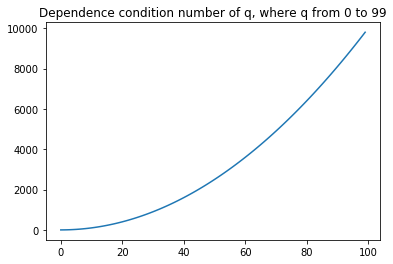

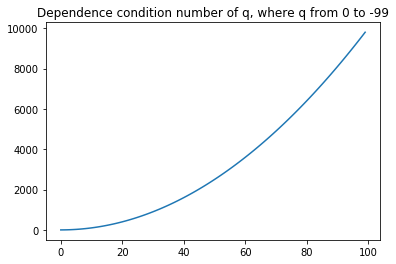

In [15]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

A_plot = []
A_plot_neg = []
N = 100
q = np.arange(N)

for i in range(len(q)):
    A = np.array([[1, i], [0, 1]])
    A_cond = np.linalg.cond(A)
    A_plot.append(A_cond)

for j in range(len(q)):
    A_neg = np.array([[1, -j], [0, 1]])
    A_cond_neg = np.linalg.cond(A_neg)
    A_plot_neg.append(A_cond_neg)

    
A_ex = np.array([[1, 0], [0, 1]])
A_cond_ex = np.linalg.cond(A_ex)
print('If q = 0, A_cond = ', A_cond_ex)
print('We can see that the matrix is well-conditioned when q close to 0')


plt.plot(A_plot)
plt.title('Dependence condition number of q, where q from 0 to 99')
plt.show()

plt.plot(A_plot_neg)
plt.title('Dependence condition number of q, where q from 0 to -99')
plt.show()

If $\|\cdot\|$ is the $l^2$-norm and $A$ is arbitrary, then $$\kappa(A)=\sqrt{\frac{\lambda_{\max}(A^*A)}{\lambda_{\min}(A^*A)}}$$

$$A^*A = A^T A = \begin{pmatrix}
1 & q\\ 
q & q^2+1\\ 
\end{pmatrix}$$

Eigenvalues:
$$det \begin{pmatrix}
1 - \lambda & q\\ 
q & q^2+1 - \lambda\\ 
\end{pmatrix} = \lambda^2 - \lambda(2+q^2) +1 = 0 $$

$$ \lambda_\pm = 0.5 \left(2+q^2 \pm |q| \sqrt{4+q^2}  \right)$$
$\lambda_+ \geq \lambda_-$, then:
$$k(A_q) = \sqrt{\frac{2+q^2 + |q| \sqrt{4+q^2}}{2+q^2 - |q| \sqrt{4+q^2}}} = 0.5 \left( 2+q^2 + |q| \sqrt{4+q^2} \right)$$

**B**

Defenition: 
$$\frac{\|\Delta \mathbf x\|}{\|\mathbf x\|}\le \kappa(A)\frac{\|\Delta\mathbf b\|}{\|\mathbf b\|},$$

where $\kappa(A)$ is **condition number**:

$$\kappa(A)=\|A\|\cdot\|A^{-1}\|$$

Our case: 
$$\frac{\|\Delta \mathbf x\|}{\|\mathbf x\|}\ge 10^6\frac{\|\Delta\mathbf b\|}{\|\mathbf b\|}.$$


\begin{align} \begin{pmatrix} 1 & q \\ 0 & 1  \end{pmatrix}\begin{pmatrix} x1 \\ x2\end{pmatrix} = \begin{pmatrix} x1+qx2 \\ x2 \end{pmatrix}\end{align} 

\begin{align} \begin{pmatrix} 1 & q \\ 0 & 1  \end{pmatrix}\begin{pmatrix} x1+ \Delta x1\\ x2+ \Delta x2\end{pmatrix} = \begin{pmatrix} x1+\Delta x1 + q(x2+ \Delta x2) \\ x2+ \Delta x2 \end{pmatrix}\end{align} 



$$\frac{\Delta x1^{2} + \Delta x2^{2}}{x1^{2} + x2^{2}}\ge 10^{12}\frac{\Delta x1^{2} + q^{2}\Delta x2^{2} + 2q\Delta x1 \Delta x2 + \Delta x2^{2} }{x1^{2} + x2^{2} + q^{2}x2^{2} + qx1x2}.$$







Take $q = - \frac{\Delta x1}{\Delta x2}$, so $q$ should be big and $\Delta x1 >> \Delta x2$

In [76]:
x = [1, 1]
q = 1
delta = 1000
    
while True:
    A = [[1, q], [0, 1]]
    dx = [delta, - delta / q]
    b = np.dot(A, x)
    b_ = [x[i] + dx[i] for i in range(2)]  
    db = b - np.dot(A, b_)
    
    left = np.sqrt(np.square(dx).sum())/np.sqrt(np.square(x).sum())  
    right = np.sqrt(np.square(db).sum())/np.sqrt(np.square(b).sum())
    if left >= 1e6 * right:
        print (q, x, dx, b, db)
        print ('min value of q = ', q)
        print ('x = ', x)
        print ('dx = ', dx)
        print ('b = ', b)
        print ('db = ', db)
        break
    q += 1
                                                    

1189 [1, 1] [1000, -0.8410428931875525] [1190    1] [0.         0.84104289]
min value of q =  1189
x =  [1, 1]
dx =  [1000, -0.8410428931875525]
b =  [1190    1]
db =  [0.         0.84104289]


### Problem 2 (2 points)
* Write a program to compute an approximate value for the derivative of a function using the finite-difference formula 

  $$f'(x)\approx \frac{f(x+h)-f(x)}{h}.$$

  Test your program using the function $\tan(x)$ at $x=1$. Determine the error by comparing with the value obtained using the analytic derivative. Plot the magnitude of the error as a function of $h$, for $h=10^{-k}, k=0,\ldots,16$. You should use log scale for $h$ and for the magnitude of the error. What is the minimum value of the error and at which $h$ is it achieved? Explain this result theoretically.
* Repeat the exercise using the centered difference approximation

 $$f'(x)\approx \frac{f(x+h)-f(x-h)}{2h}.$$

 What is now different and why?

Finite-difference formula
Min error: 2.554135347665465e-08 value of h: 1e-08


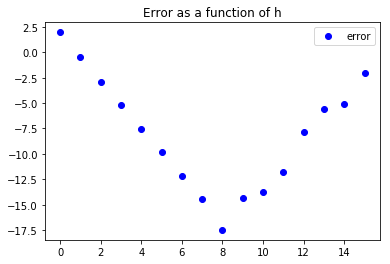

In [13]:
import numpy as np
import math
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

def func(x, h):
    funct = (math.tan(x+h) - math.tan(x))/h
    return funct
     
def deriv(x):
    deriv = 1/((math.cos(x))**2)
    return deriv

def func_centered_difference_approximation(x, h):
    f = (math.tan(x+h) - math.tan(x-h))/(2*h)
    return f

x = 1
k = 0
error_array1 = []
h_array = []
error_array2 = []
f1 = []

while k < 16:
    h = 10**(-k)
    h_array.append(h)
    
    function2 = func(x, h)
    function1 = deriv(x)
    f1.append(function1)
    function3 = func_centered_difference_approximation(x, h)
    
    error_1 = abs(function2 - function1)
    error_array1.append(error_1)
    
    error_2 = abs(function3 - function1)
    error_array2.append(error_2)
    
    k+=1


min_error = min(error_array1)
min_index_error = np.argmin(error_array1)
min_error_h = h_array[min_index_error]
print('Finite-difference formula')
print('Min error:', min_error, 'value of h:', min_error_h)

plt.figure()
plt.plot(np.log(error_array1), 'o', c = 'b', label = 'error')
plt.title('Error as a function of h')
plt.legend()
plt.show()

This corresponds very well with the $h ≈ \sqrt{\epsilon_{mach}}$ as $\epsilon_{mach}$ is approximately $10^{-16}$ and minimum value occurred around $10^{-8}$.

Centered difference approximation
Min error: 6.2239102760486276e-12 value of h: 1e-06


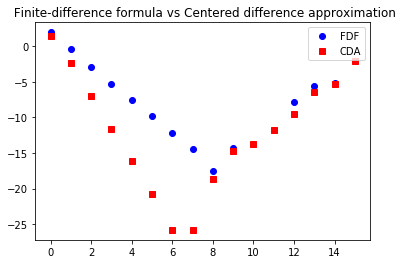

[False False False False False False  True  True False False False False
 False False False False]
We can see, that the min value of error we obtained in 1e-6 and 1e-7


In [17]:
min_error2 = min(error_array2)
min_index_error2 = np.argmin(error_array2)
min_error_h2 = h_array[min_index_error2]
print('Centered difference approximation')
print('Min error:', min_error2, 'value of h:', min_error_h2)


plt.figure()
plt.plot(np.log(error_array1), 'o', c = 'b', label = 'FDF')
plt.plot(np.log(error_array2), 's', c = 'r', label = 'CDA')
plt.title(' Finite-difference formula vs Centered difference approximation')
plt.legend()
plt.show()
min_error = np.min(error_array2)
print(min_error == error_array2 )
print('We can see, that the min value of error we obtained in 1e-6 and 1e-7')

Expand the function $f(x)$ in a Taylor series at the points $(x + h)$ and $(x - h)$.

$$ f(x+h)=f(x)+hf′(x)+ 2 f′′(x)+ 6 f′′′(x)+... $$

$$ \frac{f(x+h) - f(x)}{h} = f′(x) + \frac{h}{2}f''(x)+ ... $$


In the first order of decomposition derivative calculation error in the case of finite-difference formula:
$$O(h) = - \frac{h}{2}f''(x) + ...$$

If $h$ is chosen to be very small, rounding errors in computing on a computer may be comparable or greater than $h$.

A smaller value of the error for the same value of x gives the centered difference approximation.

$$O(h^2) = - \frac{h^2}{6}f'''(x) + ...$$

### Problem 3 (2 points)
* Implement regularized regression with an adaptive choice of regularization parameter. Your algorithm must accept the training data (`Xtrain`, `Ytrain`) and the input part of test data (`Xtest`), and output a prediction for test data (`Ypred`). You may use standard linear algebra libraries, but not specialized predictive modeling software (e.g., `scikit-learn`). Your algorithm should choose the regularization parameter by some optimization over a reasonable range of values and may use a sub-division of the training data into a train-in-train and a test-in-train components.
* Test your algorithm on real data from UCI repository:
  * https://archive.ics.uci.edu/ml/datasets/Relative+location+of+CT+slices+on+axial+axis
  * https://archive.ics.uci.edu/ml/datasets/Physicochemical+Properties+of+Protein+Tertiary+Structure
  
  Use random subsets of 300 rows as training sets, and the remaining rows as the test sets. Use the relative RMS error as the measure of accuracy.
  Compare your results with results of some linear models implemented in standard predictive modeling software    (e.g., `Ridge` and `LinearRegression` from `scikit-learn`).

In [60]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [61]:
data = np.loadtxt('slice_localization_data.csv', skiprows=1, delimiter=',')
print ('Total rows:', data.shape[0])
print ('Total columns:', data.shape[1])
N = len(data)
A = data[:,:-1] # input values
A[:,0] = 1 # remove the ID column, insert constants instead
b = A[:,-1] # output values

Total rows: 53500
Total columns: 386


In [62]:
Ntrain = 1000

inds = np.random.permutation(N)

train = inds[:Ntrain]
test = inds[Ntrain:]
Atrain = A[train]
btrain = b[train]
Atest = A[test]
btest = b[test]

In [63]:
#so-so method
Q = Atrain.T.dot(Atrain)
Num = 10
mu_p = []
mu_n = []
n = 0
while n < Num:
    mu_val_n = 10**(-n)
    mu_val_p = 10**(n)
    mu_p.append(mu_val_p)
    mu_n.append(mu_val_n)
    n+=1
    
    
def getRRMSE(btest, bpred):
    return np.linalg.norm(bpred-btest)/np.linalg.norm(btest-np.mean(btest))

y1 = Atrain.T.dot(btrain)
error_p = []
error_n = []
for each in mu_p:
    coeffs1 = np.linalg.inv(Q+each*np.eye(Atrain.shape[1])).dot(y1)
    bpred1 = Atest.dot(coeffs1)
    error_val = getRRMSE(btest, bpred1)
    #print ('RRMS error for prediction 1:', error_val)
    error_p.append(error_val)

for each in mu_n:
    coeffs1 = np.linalg.inv(Q+each*np.eye(Atrain.shape[1])).dot(y1)
    bpred1 = Atest.dot(coeffs1)
    error_val = getRRMSE(btest, bpred1)
    #print ('RRMS error for prediction 1:', error_val)
    error_n.append(error_val)
    
er_min_p_index = np.argmin(error_p)
er_min_n_index = np.argmin(error_n)

print(error_p[er_min_p_index], error_n[er_min_n_index])
            
if error_p[er_min_p_index] > error_n[er_min_n_index]:
    mu = mu_n[er_min_n_index]
    error = error_n[er_min_n_index]
else:
    mu = mu_p[er_min_p_index]
    error = error_n[er_min_p_index]
print('optimal mu = ', mu, 'error = ', error)

0.13427523938378919 0.06257778033983288
optimal mu =  1e-05 error =  0.06257778033983288


In [64]:
#normal

def getRRMSE(btest, bpred):
    return np.linalg.norm(bpred-btest)/np.linalg.norm(btest-np.mean(btest))

y1 = Atrain.T.dot(btrain)
mu = [1e-4, 1e-3]
coeffs1 = np.linalg.inv(Q+mu[0]*np.eye(Atrain.shape[1])).dot(y1)
bpred1 = Atest.dot(coeffs1)
loss_value0 = getRRMSE(btest, bpred1)
loss = [loss_value0]

k = 1
N = 99
while k < N:
    coeffs = np.linalg.inv(Q+mu[k]*np.eye(Atrain.shape[1])).dot(y1)
    bpred = Atest.dot(coeffs)
    loss.append(getRRMSE(btest, bpred))
    grad = (loss[k] - loss[k-1])/(mu[k] - mu[k-1])
    mu_value = mu[k] - (1e-3)*grad
    mu.append(mu_value)
    k+=1
    
errror_min = min(loss[:-1])
print(errror_min)

0.062487579013284084


In [65]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression as LR

    
model = Ridge()
model.fit(Atrain, btrain)
bpred_ridge = model.predict(Atest)
print ('RRMS error for Ridge model:', getRRMSE(btest, bpred_ridge))

model = LR()
model.fit(Atrain, btrain)
bpred_lr = model.predict(Atest)
print ('RRMS error for LR model:', getRRMSE(btest, bpred_lr))

print ('RRMS error for our model so-so:', error)
print ('RRMS error for our model normal:', errror_min)

RRMS error for Ridge model: 0.13558963950415379
RRMS error for LR model: 0.06176570252060477
RRMS error for our model so-so: 0.06257778033983288
RRMS error for our model normal: 0.062487579013284084


### Problem 4 (2 points)
Suppose that we use the Leapfrog algorithm with some $\Delta t$ to simulate the dynamics of the harmonic oscillator (https://en.wikipedia.org/wiki/Harmonic_oscillator) with positive mass $m$ and force constant $k$ (in other words, with the Hamiltonian function $H=\frac{m\dot x^2}{2}+\frac{kx^2}{2}$). Assuming a perfect implementation of Leapfrog, at which combinations of $\Delta t, m, k$ will the simulation diverge as $n\to\infty$, in the sense that $\sup_n(\tilde x_n^2+\tilde v_{n+1/2}^2)=\infty$?

\begin{align}
\tilde x_{n+1} &= \tilde x_{n}+\tilde v_{n+1/2}\Delta t\\
\tilde v_{n+1/2} &= \tilde v_{n-1/2}-\frac{k}{m}x_n\Delta t
\end{align}

from 1 equation: $$v_{n+1/2} = \frac{x_{n+1} - x_n}{\Delta t}$$
into second equation: $$\frac{x_{n+1} - 2x_n +x_{n-1}}{\Delta t} = - \frac{k}{m} x_n \Delta t$$
Thus: $$x_{n+1} + \left(\frac{k \Delta t^2}{m}  -2\right) x_n  + x_{n-1} = 0$$

$$x_n = \lambda^n$$

$$\lambda^2 + \left(\frac{k \Delta t^2}{m}  -2\right) \lambda + 1 = 0$$

$$\lambda_{1,2} = 0.5 \left(2 - \frac{k \Delta t^2}{m} \pm \sqrt{\frac{k \Delta t^2}{m}(\frac{k \Delta t^2}{m}-4)} \right) $$

$$\frac{k \Delta t^2}{m} > 4 \Longleftrightarrow \Delta t> 2\sqrt{\frac{m}{k}}$$

If we variable $v_{n+1/2}$ we get the same results. 

$\sup_n(x^2_n+v^2_{n+1/2})=\infty $

$\sup_n(x^2_n)=\infty  $

$\sup_n|x_n| = \infty$. 

So enough to investigate the conditions of convergence of this scheme for variable x.

$\sup_n |x_n| = \sup_n |\lambda^n| = \infty$. Hence if $|\lambda| > 1$ then the scheme doesn't converge.

Scheme is converging when  $\frac{k \Delta t^2}{m}∈[0,4]$. 

### Problem 5 (2 points)
Consider the velocity Verlet method for solving the equation $\frac{d}{dt}{x\choose v}={v\choose f_1(x)}$: 

\begin{align}
\tilde v_{n+1/2} &= \tilde v_{n}+\frac{1}{2}f_1(\tilde x_n)\Delta t\\
\tilde x_{n+1} &= \tilde x_{n}+\tilde v_{n+1/2}\Delta t\\
\tilde v_{n+1} &= \tilde v_{n+1/2}+\frac{1}{2}f_1(\tilde x_{n+1})\Delta t
\end{align}
Find its global convergence order and verify it experimentally.

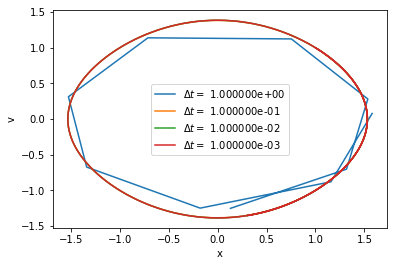

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f1(x):
    return - np.sin(x)

def Ver(f1, x0, v0, dt=1e-3, N=10000):
    xHistory = [x0] # at integer times
    vHistory_ = [v0+dt/2.*f1(x0)] # at half-integer times
    vHistory = [v0]
    tHistory = [0]
    for n in range(N):
        vHistory_.append(vHistory[-1]+(1/2)*dt*f1(xHistory[-1]))
        xHistory.append(xHistory[-1]+dt*vHistory_[n+1])
        vHistory.append(vHistory_[n+1] + (1/2)*f1(xHistory[n+1])*dt)
        tHistory.append(dt*(n+1))
    return xHistory[1:], vHistory[1:], tHistory[1:]

for m in range(0,4):
    dt = 10**(-m)
    xHistory, vHistory,_ = Ver(f1, 1., 1., dt=dt, N=int(10./dt)) 
    plt.plot(xHistory, vHistory, label='$\Delta t=$ %e' %dt )
plt.xlabel('x')
plt.ylabel('v')
plt.legend(loc='best')  
plt.show()    

Error in E at dt=1.000000e+00: 2.200689e-01
Error in E at dt=1.000000e-01: 1.425750e-03
Error in E at dt=1.000000e-02: 1.274388e-05
Error in E at dt=1.000000e-03: 1.257985e-07
Error in E at dt=1.000000e-04: 1.256326e-09


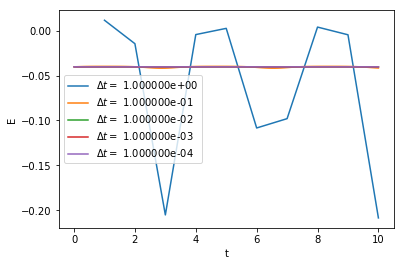

In [11]:
def E(X):
    return X[1]*X[1]/2-np.cos(X[0])

for m in range(0,5):
    dt = 10**(-m)
    xHistory, vHistory, tHistory = Ver(f1, 1., 1., dt=dt, N=int(10./dt)) 
    Ehistory = [E([xHistory[n], vHistory[n]]) for n in range(len(xHistory))]
    plt.plot(tHistory, Ehistory, label='$\Delta t=$ %e' %dt )
    print ('Error in E at dt=%e: %e' %(dt, np.abs(Ehistory[-1]-Ehistory[0]))) 
plt.xlabel('t')
plt.ylabel('E')
plt.legend(loc='best')
plt.show()

1 equation:
$$ x_{n+1} = x_{n}+ v_{n+1/2}\Delta t $$

$$v_{n+1/2} = \frac{x_{n+1} - x_{n}}{\Delta t}$$

2 equation:

$$v_{n+1/2} = v_{n}+\frac{1}{2}f_1( x_n)\Delta t $$

$$v_{n} = v_{n+1/2} - \frac{1}{2}f_1(x_n)\Delta t = \frac{x_{n+1} - x_{n}}{\Delta t} - \frac{1}{2}f_1( x_n)\Delta t$$

3 equation: 
$$\frac{x_{n+2} - x_{n+1}} {\Delta t} - \frac{1}{2} f_1(x_{n+1}) \Delta t = \frac{x_{n+1} - x_n} {\Delta t} + \frac{1}{2} f_1(x_{n+1}) \Delta t $$

$$\frac{x_{n+2} - 2x_{n+1} + x_n} {\Delta t ^2} = f(x_{n+1}) $$

If decompose the function as Taylor series and divide by dt we will get approximation is $O(\Delta t ^2)$.